# Dependencies

In [1]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

# Load data

In [2]:
new_data = pd.read_csv('../input/aptos2019-blindness-detection/train.csv')
old_data = pd.read_csv('../input/diabetic-retinopathy-resized/trainLabels.csv')

old_data = old_data[['image', 'level']]
old_data.columns = new_data.columns
old_data["id_code"] = old_data["id_code"].apply(lambda x: x + ".jpeg")

# Sample rows of diagnosis = 0
diag_0 = old_data[old_data['diagnosis'] == 0].sample(frac=0.11, random_state=seed)
diag_2 = old_data[old_data['diagnosis'] == 2].sample(frac=0.5, random_state=seed)
diag_oth = old_data[(old_data['diagnosis'] != 0) & (old_data['diagnosis'] != 2)]
train_df = diag_0.append(diag_2).append(diag_oth)

print('Number of train samples: ', train_df.shape[0])
display(train_df.head())

Number of train samples:  9509


,id_code,diagnosis
32132,40576_left.jpeg,0
26166,33112_left.jpeg,0
25243,31961_right.jpeg,0
2010,2515_left.jpeg,0
31965,40364_right.jpeg,0


# Hold-out train validation split 15%) of new dataset data

In [3]:
train, validation = train_test_split(train_df, test_size=0.15, random_state=seed)

# Train & Validation label distribution

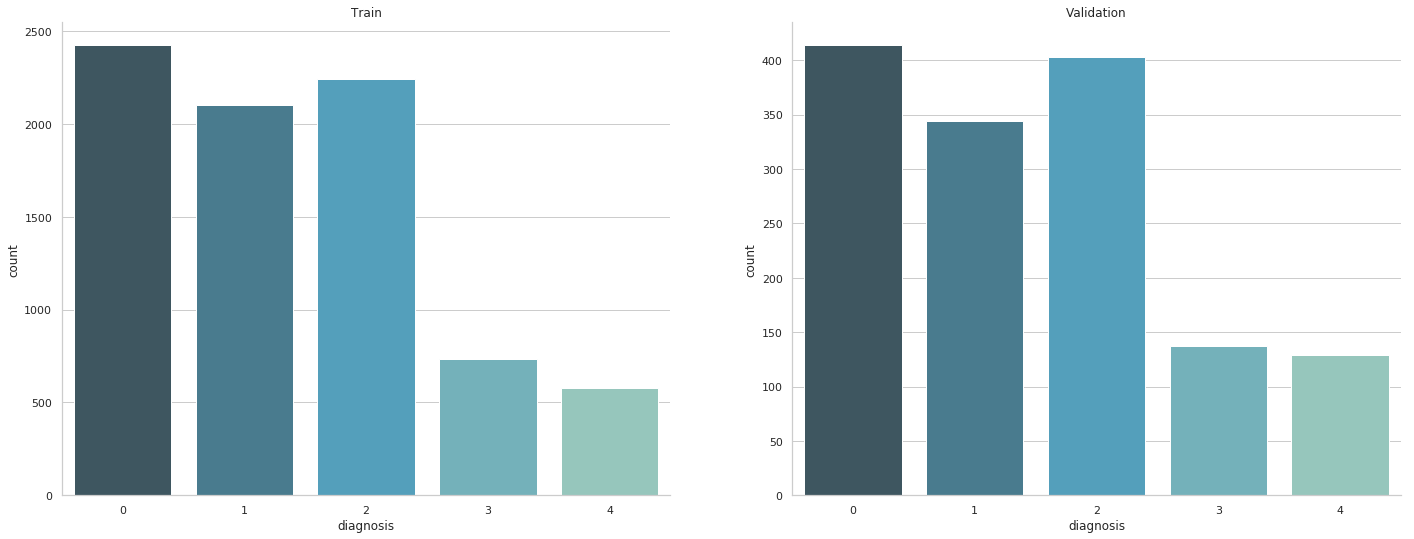

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 8.7))
sns.countplot(x="diagnosis", data=train, palette="GnBu_d", ax=ax1).set_title('Train')
sns.countplot(x="diagnosis", data=validation, palette="GnBu_d", ax=ax2).set_title('Validation')
sns.despine()
plt.show()

# Output hold-out set

In [5]:
train['set'] = 'train'
validation['set'] = 'validation'
train_complete = train.append(validation)
train_complete.to_csv('hold-out.csv', index=False)
print('Number of train samples: ', train.shape[0])
print('Number of validation samples: ', validation.shape[0])
display(train_complete.head())

Number of train samples:  8082
Number of validation samples:  1427


,id_code,diagnosis,set
34232,43276_left.jpeg,0,train
32195,40667_right.jpeg,1,train
28275,35803_right.jpeg,1,train
30439,38481_right.jpeg,2,train
18935,23890_right.jpeg,1,train
